In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
import numpy as np
import missingno as msno
import plotly.express as px
from sklearn.linear_model import LinearRegression

In [25]:
data = pd.read_csv('Boston 2019-04-07 to 2021-12-31 Weather.csv')

In [26]:
data

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Boston,4/7/19,19.3,6.6,12.7,19.3,5.2,12.4,3.6,55.56,...,285.5,15.4,7,2019-04-07T06:16:50,2019-04-07T19:16:39,0.02,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"F2140,KOWD,AV085,72509854704,KMQE,KBED,KBOS,72..."
1,Boston,4/8/19,13.3,3.3,7.0,13.3,-0.3,4.0,4.2,83.09,...,48.8,2.3,1,2019-04-08T06:15:09,2019-04-08T19:17:47,0.05,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"F2140,KOWD,AV085,72509854704,KMQE,KBOS,7250901..."
2,Boston,4/9/19,5.0,2.2,3.6,4.3,-1.9,0.2,1.8,87.80,...,67.6,3.4,2,2019-04-09T06:13:29,2019-04-09T19:18:55,0.08,"Rain, Overcast",Cloudy skies throughout the day with late afte...,rain,"F2140,KOWD,AV085,72509854704,KMQE,KBED,KBOS,72..."
3,Boston,4/10/19,8.3,3.3,5.3,4.8,-1.5,1.3,-2.2,61.28,...,250.0,13.5,7,2019-04-10T06:11:49,2019-04-10T19:20:02,0.13,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"F2140,KOWD,AV085,72509854704,KMQE,KBOS,7250901..."
4,Boston,4/11/19,10.0,1.7,6.1,10.0,-3.6,3.1,-5.6,44.03,...,368.4,19.9,8,2019-04-11T06:10:10,2019-04-11T19:21:10,0.18,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,"F2140,KOWD,AV085,72509854704,KMQE,KBOS,7250901..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Boston,12/27/21,1.7,-1.1,0.5,1.7,-6.7,-3.4,-5.2,65.61,...,93.8,3.0,2,2021-12-27T07:12:42,2021-12-27T16:18:24,0.78,Partially cloudy,Partly cloudy throughout the day.,wind,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
996,Boston,12/28/21,7.2,0.7,3.9,4.2,-1.7,1.6,-0.7,74.15,...,130.8,4.2,4,2021-12-28T07:12:57,2021-12-28T16:19:08,0.83,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
997,Boston,12/29/21,5.7,2.8,4.4,5.7,-0.1,3.1,-1.1,68.08,...,78.6,2.5,2,2021-12-29T07:13:11,2021-12-29T16:19:54,0.88,"Rain, Overcast",Cloudy skies throughout the day with early mor...,rain,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
998,Boston,12/30/21,5.7,3.3,4.6,5.7,0.8,3.2,2.6,87.69,...,37.2,1.2,1,2021-12-30T07:13:21,2021-12-30T16:20:41,0.93,"Rain, Overcast",Cloudy skies throughout the day with afternoon...,rain,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."


In [27]:
data.shape

(1000, 30)

# Drop Columns

In [28]:
# Since "conditions" and "description" can directly determine the class attribute
#  we can drop the following columns:
data = data.drop(['conditions', 'description'], axis=1)
# based on our own knowledge, we can assume that name, datetime, sunset, sunrise, and stations is useless 
# so we can drop the following columns:
data = data.drop(['name', 'datetime', 'sunset', 'sunrise', 'stations'], axis=1)

In [29]:
data.shape

(1000, 23)

# Data Analysis

## Missing Values

Percentage of missing values on each column:

windgust            18.2
tempmax              0.0
moonphase            0.0
uvindex              0.0
solarenergy          0.0
solarradiation       0.0
visibility           0.0
cloudcover           0.0
sealevelpressure     0.0
winddir              0.0
windspeed            0.0
snowdepth            0.0
tempmin              0.0
snow                 0.0
precipcover          0.0
precip               0.0
humidity             0.0
dew                  0.0
feelslike            0.0
feelslikemin         0.0
feelslikemax         0.0
temp                 0.0
icon                 0.0
dtype: float64


Text(0.5, 1.0, 'Missing values Matrix')

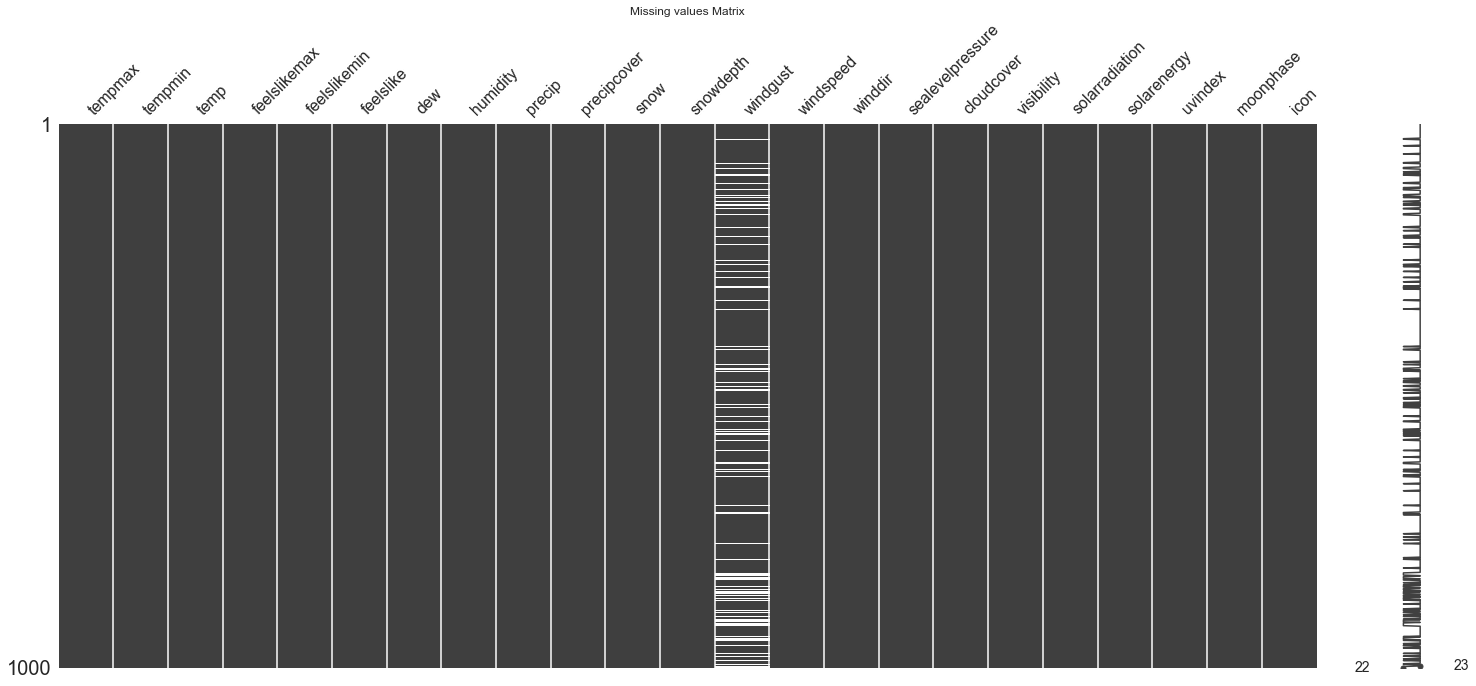

In [30]:
print("Percentage of missing values on each column:\n")
print(((data.isnull().sum()/data.shape[0])*100).sort_values(ascending=False))
msno.matrix(data)
plt.title("Missing values Matrix")

### Use linear regression to interpolate windgust from windspeed

In [31]:
data[['windgust', 'windspeed']].corr()

,windgust,windspeed
windgust,1.000000,0.809452
windspeed,0.809452,1.000000


In [32]:
# Since windgust and windspeed has a strong correlation 
# we can apply winspeed in the linear regression to fill in the null windgust value.
regression_df = data[~(data['windspeed'].isnull()) & ~(data['windgust'].isnull())]
regression_df.shape

(818, 23)

<AxesSubplot:>

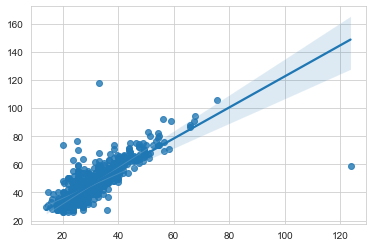

In [33]:
windspeed = []
windgust = []
for i, row in regression_df.iterrows():
    if row['windgust'] and row['windspeed']:

        windspeed.append(row['windspeed'])
        windgust.append(row['windgust'])

x = np.array(windspeed)
y = np.array(windgust)
        
sns.regplot(x=windspeed, y=windgust)

In [34]:
X = x.reshape(-1, 1)
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [35]:
reg.intercept_

12.02233467071298

In [36]:
reg.coef_

array([1.10552482])

In [37]:
# y = 12.02 + 1.11*x 
# where y = windgust and x = windspeed
def x_to_y(x):
    return reg.intercept_ + reg.coef_ * x

In [38]:
filled_df = data.copy()

In [39]:
# filling in the blank windgust
filled_df['windgust'] = data['windgust'].fillna(data['windspeed'].apply(lambda x: x_to_y(x)[0]))
filled_df[filled_df['windgust'].isnull()]

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipcover,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon


In [40]:
filled_df[~filled_df.apply(tuple,1).isin(data.apply(tuple,1))]['windgust']

27     28.052445
28     30.152942
40     34.353936
55     40.323770
71     34.243384
         ...    
992    28.052445
993    31.921781
997    31.811229
998    26.173052
999    24.293660
Name: windgust, Length: 182, dtype: float64

In [41]:
filled_df.to_csv('clean_weather_data.csv', index=False)